PROBLEM STATEMENT:-There is a sports accessories company ABC that sells sports gear across the globe. The data has fields such as Revenue, Quantity, Gross Margin, Order Method, Time, Country etc spread from 2012 to 2014 across 4 Quarters (Q1 through Q4). Based on the Global Outlook and growth forecasts made by economist at ABC, the company has decided to sell total units equal to 211,555,475 in 2015. However, this is an overall number and Product Managers for individual countries don't know how this number would drill down to individual Product. Your job as a Business Analyst is to help the Product Managers get the numbers so that they can plan effectivel

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the csv file
df=pd.read_csv(r'C:\Users\Vikas\Downloads\Gross_Margin_Data.csv')


In [3]:
#Dimension of data
print('Dimension of data are:-',df.shape)

Dimension of data are:- (88475, 11)


In [4]:
#showing columns
print('Columns of Gross_Margin_Data are..........')
df.columns

Columns of Gross_Margin_Data are..........


Index(['Retailer country', 'Order method type', 'Retailer type',
       'Product line', 'Product type', 'Product', 'Year', 'Quarter', 'Revenue',
       'Quantity', 'Gross margin'],
      dtype='object')

In [5]:
#Getting the first few records
df.head()

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
0,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,2012,Q1 2012,59628.66,489,0.347548
1,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,Q1 2012,35950.32,252,0.474274
2,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Dome,2012,Q1 2012,89940.48,147,0.352772
3,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Gazer 2,2012,Q1 2012,165883.41,303,0.282938
4,United States,Fax,Outdoors Shop,Camping Equipment,Sleeping Bags,Hibernator Lite,2012,Q1 2012,119822.20,1415,0.291450


### Task 1: How many missing/NA/Null values are present in the data?

In [6]:
#checking null value
df.isnull().sum()

Retailer country       0
Order method type      0
Retailer type          0
Product line           0
Product type           0
Product                0
Year                   0
Quarter                0
Revenue                0
Quantity               0
Gross margin         581
dtype: int64

There are 581 NA entries in the Gross margin column
<li>These should be replaced by the mean of the Gross Margin column
    <li>So that it doesnt affect result from any other analysis

In [7]:
#fill the NaN value with their mean
df['Gross margin']=df['Gross margin'].fillna(df['Gross margin'].mean())

In [8]:
#checking again for NA values
df.isna().sum()

Retailer country     0
Order method type    0
Retailer type        0
Product line         0
Product type         0
Product              0
Year                 0
Quarter              0
Revenue              0
Quantity             0
Gross margin         0
dtype: int64

Now ,there are no NA values in Gross margin column

### Task2: Which order method is most widely used?

In [9]:
df['Order method type'].value_counts()

Web            69181
Sales visit     7168
Telephone       5814
E-mail          3092
Fax             1664
Mail            1024
Special          532
Name: Order method type, dtype: int64

web method is most prevalent

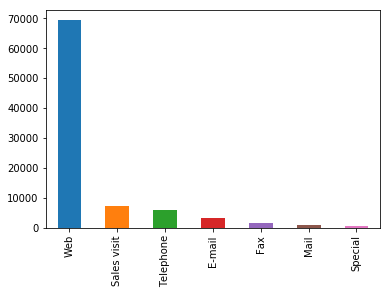

In [10]:
df['Order method type'].value_counts().plot(kind='bar')

web method is most prevalent

### Task 3:Which Product has the max units sold on an overall basis?

In [11]:
df['Product'].value_counts()

Polar Sun                        1242
Zone                             1115
TX                               1115
Cat Eye                          1098
Infinity                         1097
Inferno                          1095
Maximus                          1091
Legend                           1080
Dante                            1040
Fairway                          1020
Venue                            1020
Hawk Eye                          982
Ranger Vision                     981
Polar Ice                         976
Polar Sports                      951
Trendi                            948
Lux                               945
Retro                             935
Capri                             902
Kodiak                            898
Bella                             876
Max Gizmo                         863
Pocket Gizmo                      812
Mountain Man Analog               811
Sam                               803
Astro Pilot                       801
Mountain Man

Polar Sun has the highest unit sold

### Task 4:Which country has the max value of Gross Margin per unit Quantity

In [12]:
#Here we need to aggregate the data at a country level
df1=df.groupby('Retailer country')['Gross margin','Quantity'].sum()
df1

,Gross margin,Quantity
Retailer country,,
Australia,1653.515075,2000781
Austria,1741.378167,2102206
Belgium,1663.631892,1799021
Brazil,1473.126531,1957452
Canada,2671.312461,4419144
China,1627.638880,4596986
Denmark,1042.406875,962099
Finland,1524.103877,2786800
France,2611.259661,4044378


In [13]:
df1.columns #only gross margin and quantity are present as columns

Index(['Gross margin', 'Quantity'], dtype='object')

In [14]:
# We  need to reset the index of df1 so that Retailer Country also becomes a column
df1=df1.reset_index()

In [15]:
# Now creating a column of Gross Margin/Quantity
df1['Unit_Measure']=df1['Gross margin']/df1['Quantity']
df1.sort_values('Unit_Measure',ascending=False).head(10)

,Retailer country,Gross margin,Quantity,Unit_Measure
6,Denmark,1042.406875,962099,0.001083
18,Switzerland,1846.908455,1822191,0.001014
17,Sweden,1301.494760,1403596,0.000927
2,Belgium,1663.631892,1799021,0.000925
1,Austria,1741.378167,2102206,0.000828
0,Australia,1653.515075,2000781,0.000826
3,Brazil,1473.126531,1957452,0.000753
14,Netherlands,1886.132962,2687404,0.000702
13,Mexico,1725.812606,2547117,0.000678
9,Germany,2431.919092,3733677,0.000651


We can see that Denmark has the highest value of Gross Margin/Unit Quantity sold

### Task 5:Which product line under 'Web' Method type has highest Unit sold for 2012

In [16]:
#Before we start on this we need to first know which is the most preferred method of ordering products
#df['Order method type'].value_counts() # Web is the most preferred method
## Lets see which product under Web has the most Sales
df[df['Order method type']=='Web'].groupby(['Product'])['Quantity'].sum().sort_values(ascending=False).head()



Product
Zone                   3800665
TrailChef Water Bag    2610761
Granite Carabiner      2445768
Single Edge            2238548
Cat Eye                2106304
Name: Quantity, dtype: int64

Product by the name ZONE is most preferentially ordered using Web medium.

In [17]:
# Lets verify if this is true for the year 2012 as well
df['Year'].head()

0    2012
1    2012
2    2012
3    2012
4    2012
Name: Year, dtype: int64

In [18]:
df[(df['Order method type']=='Web') & (df['Year']==2012)].groupby(['Year','Product'])['Quantity'].sum().sort_values(ascending=False).head()

Year  Product            
2012  Zone                   1456221
      TrailChef Water Bag     712366
      Cat Eye                 676358
      Fairway                 664208
      BugShield Extreme       556006
Name: Quantity, dtype: int64

For 2012 as well 'Zone'product has the most Sales in 2012


### Task 6:Does Product named Zone has the most Sales under Web Method of Ordering in 2013 and 2014 also.

In [19]:
df2=df[df['Order method type']=='Web'].groupby(['Year','Product'])['Quantity'].sum()

In [20]:
df2.head()

Year  Product           
2012  Aloe Relief           23869
      Astro Pilot           36616
      Bear Edge             49030
      Bear Survival Edge    18116
      Bella                 81491
Name: Quantity, dtype: int64

In [21]:
df3=df2.reset_index()
df3.head()

,Year,Product,Quantity
0,2012,Aloe Relief,23869
1,2012,Astro Pilot,36616
2,2012,Bear Edge,49030
3,2012,Bear Survival Edge,18116
4,2012,Bella,81491


In [22]:
df3=df3.sort_values(['Year','Quantity'],ascending=[True,False])

In [23]:
df3.groupby(['Year']).head(2) # Gives the top 2 products sold for each year under Web Method

,Year,Product,Quantity
142,2012,Zone,1456221
138,2012,TrailChef Water Bag,712366
284,2013,Zone,1533812
280,2013,TrailChef Water Bag,1065140
339,2014,Granite Carabiner,1033115
420,2014,TrailChef Water Bag,833255


we can see that for 2012 and 2013, Zone has the most Sales, but for 2014 Granite Carabiner has the most Sales
<li>So Zone doesnt have most Sales for Web Orders from 2012 to 2014.


### Task 7:Which product has seen the max decrease in Revenue from 2012 to 2014

In [24]:
df4=df.groupby(['Product','Year'])['Revenue'].sum().reset_index()

In [25]:
df4.shape

(425, 3)

In [26]:
# We need to remove the value corresponding to 2013 as only 2012 and 2014 are required
t_val=[2012,2014]

In [27]:
df5=df4[df4['Year'].isin(t_val)]

In [28]:
df5.shape

(283, 3)

In [29]:
# Now lets pivot df4 based on column 'Year'
p = df5.pivot(index='Product', columns='Year', values='Revenue')

In [30]:
p.tail(16) #there are some NaN in p

Year,2012,2014
Product,,
Trail Scout,5039412.00,NaN
Trail Star,1298836.00,NaN
TrailChef Canteen,2883663.59,2521932.51
TrailChef Cook Set,10543390.64,8933514.22
TrailChef Cup,1494470.09,1322032.57
TrailChef Deluxe Cook Set,14013466.74,11493538.87
TrailChef Double Flame,9295056.87,7141235.40
TrailChef Kettle,6645022.45,5284313.27
TrailChef Kitchen Kit,4985140.88,4186927.70


In [31]:
p.isna().sum()

Year
2012    1
2014    4
dtype: int64

We see that there are certain NA/Null values in p

In [32]:
#these null values have to be replaced with 0
p[2012]=p[2012].fillna(0)
p[2014]=p[2014].fillna(0)

In [33]:
# Checkingt to see if there is still any NA/Null values in p
p.isna().sum()

Year
2012    0
2014    0
dtype: int64

In [34]:
# Creating another column called Perc_Change
p['Perc_Change']=(p[2014]-p[2012])/p[2012]
p.head()

Year,2012,2014,Perc_Change
Product,,,
Aloe Relief,181052.14,51834.53,-0.713704
Astro Pilot,5460410.00,8277139.00,0.515846
Auto Pilot,0.00,2573485.00,inf
Bear Edge,2702458.18,3051955.68,0.129326
Bear Survival Edge,2084174.39,2349087.50,0.127107


In [35]:
# Sorting p to get the highest percentage decrease
p.sort_values('Perc_Change').head(15)

Year,2012,2014,Perc_Change
Product,,,
Opera Vision,2791910.00,0.00,-1.000000
Trail Star,1298836.00,0.00,-1.000000
Trail Scout,5039412.00,0.00,-1.000000
Trail Master,2501235.00,0.00,-1.000000
Sun Blocker,1188143.55,171380.00,-0.855758
Sun Shelter Stick,1516232.45,220915.00,-0.854300
Sun Shelter 30,3670416.85,534878.60,-0.854273
Sun Shelter 15,1960766.00,288856.62,-0.852682
Sun Shield,2203124.82,345948.00,-0.842974


Sun Blocker has seen the maximum decrease in Revenue from 2012 to 2014

### Task 8:In Product line, Personal Accessories has seen a decline in Gross Margin

* Identify which Product has contributed most to this

* Identify which country has contributed most to this

#### Identify which Product has contributed most to this

In [36]:
# Lets first check what is the overall percentage decrease from 2013 to 2014
df7=df[(df['Product line']=='Personal Accessories') & df['Year'].isin(['2013','2014'])]

In [37]:
df7.groupby(['Year'])['Gross margin'].sum()

Year
2013    6441.682867
2014    4196.334128
Name: Gross margin, dtype: float64

We can see that there is approx 35% dip in the gross margin

<li>The decline in Gross Margin can be because of the following things
<li>The Top Product with max Gross Margin in 2013 had a dip in 2014

In [38]:
# Lets check this point
df8=df7.groupby(['Product','Year'])['Gross margin'].sum().reset_index()
df8.head()

,Product,Year,Gross margin
0,Astro Pilot,2013,131.899009
1,Astro Pilot,2014,89.471164
2,Auto Pilot,2013,59.998795
3,Auto Pilot,2014,53.102940
4,Bear Edge,2013,92.863755


In [39]:
df9=df8.pivot(index='Product',columns='Year',values='Gross margin').sort_values(2013,ascending=False)
df9.head()

Year,2013,2014
Product,,
Polar Sun,297.612010,136.781985
Polar Sports,256.404218,116.690161
Polar Ice,216.632270,95.972592
Maximus,196.890837,142.461049
TX,179.825022,128.926174


In [40]:
df10=df9.fillna(0)

In [41]:
# Let create a new column indicating percentage decrease
df10['Perc_change']=(df10[2013]-df10[2014])/df10[2013]
df10.head()


Year,2013,2014,Perc_change
Product,,,
Polar Sun,297.612010,136.781985,0.540402
Polar Sports,256.404218,116.690161,0.544898
Polar Ice,216.632270,95.972592,0.556979
Maximus,196.890837,142.461049,0.276447
TX,179.825022,128.926174,0.283047


This gives the products that had the max gross margin in 2013

<li>but saw a significant dip (top 3 product had a dip of more than 50%)

In [42]:
#Lets also check the outlook in comparison to 2012
df11=df[(df['Product line']=='Personal Accessories')]
df11.groupby(['Year'])['Gross margin'].sum()

Year
2012    6255.061468
2013    6441.682867
2014    4196.334128
Name: Gross margin, dtype: float64

 Gross Margin of 2012 and 2013 are comparable so there has been really significant drop in Gross Margin in 2014

#### Identify which country has contributed most to this

In [43]:
df12=df7.groupby(['Retailer country','Year'])['Gross margin'].sum().reset_index()

In [44]:
df13=df12.pivot(index='Retailer country',columns='Year',values='Gross margin').sort_values(2013,ascending=False)

In [45]:
df13.head()

Year,2013,2014
Retailer country,,
United States,457.914986,300.708950
Canada,431.894582,257.209599
Germany,389.080621,243.533900
Japan,385.490122,259.113389
France,371.335603,254.601863


In [46]:
df14=df13.fillna(0)

In [47]:
# Let create a new column indicating percentage decrease
df14['Perc_change']=(df14[2013]-df14[2014])/df14[2013]
df14.head()

Year,2013,2014,Perc_change
Retailer country,,,
United States,457.914986,300.708950,0.343308
Canada,431.894582,257.209599,0.404462
Germany,389.080621,243.533900,0.374079
Japan,385.490122,259.113389,0.327834
France,371.335603,254.601863,0.314362


Top 5 countries have seen a dip in Gross Margin
<li>Now we are in a position to comment on the product as well as countries that have contributed to the decrease in Gross Margin

### Task 9: Identify top products for each country with respect to Revenue from 2012 to 2014

In [48]:
df15=df.groupby(['Retailer country','Product','Year'])['Revenue'].sum().reset_index()

In [49]:
df16=df15.sort_values(['Retailer country','Year','Revenue'],ascending=False)
df17=df16.groupby(['Retailer country','Year']).head(2)
df17.head(20)

,Retailer country,Product,Year,Revenue
8728,United States,Inferno,2014,6032958.50
8838,United States,Star Lite,2014,6018931.09
8904,United States,Zone,2013,10117895.60
8837,United States,Star Lite,2013,8445996.59
8903,United States,Zone,2012,9315478.60
8836,United States,Star Lite,2012,7804765.34
8413,United Kingdom,Star Lite,2014,2098657.04
8303,United Kingdom,Inferno,2014,1812185.10
8479,United Kingdom,Zone,2013,3268344.90
8412,United Kingdom,Star Lite,2013,2945320.42


In [50]:
df17.head(12)

,Retailer country,Product,Year,Revenue
8728,United States,Inferno,2014,6032958.50
8838,United States,Star Lite,2014,6018931.09
8904,United States,Zone,2013,10117895.60
8837,United States,Star Lite,2013,8445996.59
8903,United States,Zone,2012,9315478.60
8836,United States,Star Lite,2012,7804765.34
8413,United Kingdom,Star Lite,2014,2098657.04
8303,United Kingdom,Inferno,2014,1812185.10
8479,United Kingdom,Zone,2013,3268344.90
8412,United Kingdom,Star Lite,2013,2945320.42


In [51]:
# Lets look at the Country level data
df['Retailer country'].value_counts()

United States     7482
Canada            5923
France            5779
Germany           5397
Japan             5359
United Kingdom    5102
Netherlands       4199
Switzerland       4103
Italy             4018
Austria           3862
Mexico            3845
Belgium           3710
Australia         3665
China             3652
Spain             3557
Singapore         3443
Finland           3409
Korea             3399
Brazil            3288
Sweden            2925
Denmark           2358
Name: Retailer country, dtype: int64

In [52]:
# The total Quota for 2015 is 211,555,475 Units in terms of Quantity
# Now we need to drill down this number to each country, Product line and Quarter

In [53]:
# Calculating the Total Revenue for 2014 accross all countries
df[df['Year']==2014].groupby(['Retailer country'])['Revenue'].sum().sort_values(ascending=False)

Retailer country
United States     1.913121e+08
Japan             8.318825e+07
Canada            7.332521e+07
China             7.063338e+07
United Kingdom    6.488166e+07
France            6.420990e+07
Germany           5.742183e+07
Singapore         4.711469e+07
Korea             4.701495e+07
Italy             4.662580e+07
Netherlands       4.621297e+07
Finland           4.474672e+07
Spain             4.167992e+07
Mexico            3.840177e+07
Australia         3.589319e+07
Austria           3.380179e+07
Switzerland       3.298171e+07
Brazil            3.144084e+07
Belgium           2.818684e+07
Sweden            2.630800e+07
Denmark           1.195480e+07
Name: Revenue, dtype: float64

In [54]:
# Now Calculating the proportion of Total Revenue for 2014 accross all countries
df_L1gpby=df[df['Year']==2014].groupby(['Retailer country'])
df_L1Rev=df_L1gpby['Revenue'].sum().reset_index()
df_L1Rev.head()

,Retailer country,Revenue
0,Australia,35893188.50
1,Austria,33801788.98
2,Belgium,28186839.74
3,Brazil,31440841.48
4,Canada,73325209.39


In [55]:
df_L1Rev['Perc_Share']=100*df_L1Rev['Revenue']/df_L1Rev['Revenue'].sum()
df_L1Rev.sort_values('Perc_Share',ascending=False)


,Retailer country,Revenue,Perc_Share
20,United States,1.913121e+08,17.122158
11,Japan,8.318825e+07,7.445230
4,Canada,7.332521e+07,6.562501
5,China,7.063338e+07,6.321586
19,United Kingdom,6.488166e+07,5.806816
8,France,6.420990e+07,5.746694
9,Germany,5.742183e+07,5.139172
15,Singapore,4.711469e+07,4.216697
12,Korea,4.701495e+07,4.207771
10,Italy,4.662580e+07,4.172942


In [56]:
# Now with the overall budget number for 2015, we can multiply it with the Perc_Share for each country
df_L1Rev['Country_Budget']=df_L1Rev['Perc_Share']*21555474.59
df_L1Rev

,Retailer country,Revenue,Perc_Share,Country_Budget
0,Australia,3.589319e+07,3.212389,6.924457e+07
1,Austria,3.380179e+07,3.025212,6.520988e+07
2,Belgium,2.818684e+07,2.522682,5.437761e+07
3,Brazil,3.144084e+07,2.813910,6.065517e+07
4,Canada,7.332521e+07,6.562501,1.414578e+08
5,China,7.063338e+07,6.321586,1.362648e+08
6,Denmark,1.195480e+07,1.069937,2.306301e+07
7,Finland,4.474672e+07,4.004767,8.632466e+07
8,France,6.420990e+07,5.746694,1.238727e+08
9,Germany,5.742183e+07,5.139172,1.107773e+08


In [57]:
# Rounding off the 'Perc_Share' values to 2 decimal places
df_L1Rev['Perc_Share']=[round(i,2) for i in df_L1Rev['Perc_Share']]
df_L1Rev

,Retailer country,Revenue,Perc_Share,Country_Budget
0,Australia,3.589319e+07,3.21,6.924457e+07
1,Austria,3.380179e+07,3.03,6.520988e+07
2,Belgium,2.818684e+07,2.52,5.437761e+07
3,Brazil,3.144084e+07,2.81,6.065517e+07
4,Canada,7.332521e+07,6.56,1.414578e+08
5,China,7.063338e+07,6.32,1.362648e+08
6,Denmark,1.195480e+07,1.07,2.306301e+07
7,Finland,4.474672e+07,4.00,8.632466e+07
8,France,6.420990e+07,5.75,1.238727e+08
9,Germany,5.742183e+07,5.14,1.107773e+08


In [58]:
# Representing values in 'Perc_Share' column to %

s1=pd.Series(["{0:.2f}%".format(j*1) for j in df_L1Rev['Perc_Share']])
s1

0      3.21%
1      3.03%
2      2.52%
3      2.81%
4      6.56%
5      6.32%
6      1.07%
7      4.00%
8      5.75%
9      5.14%
10     4.17%
11     7.45%
12     4.21%
13     3.44%
14     4.14%
15     4.22%
16     3.73%
17     2.35%
18     2.95%
19     5.81%
20    17.12%
dtype: object

In [59]:
#Combining df_CountrygRev and s1 to create df_CountrygRev_Formatted
df_L1Rev_Formatted=pd.concat([df_L1Rev,s1],axis=1)
df_L1Rev_Formatted=df_L1Rev_Formatted.rename(columns={ df_L1Rev_Formatted.columns[4]: "Perc_share" })
df_L1Rev_Formatted.head()

,Retailer country,Revenue,Perc_Share,Country_Budget,Perc_share
0,Australia,35893188.50,3.21,6.924457e+07,3.21%
1,Austria,33801788.98,3.03,6.520988e+07,3.03%
2,Belgium,28186839.74,2.52,5.437761e+07,2.52%
3,Brazil,31440841.48,2.81,6.065517e+07,2.81%
4,Canada,73325209.39,6.56,1.414578e+08,6.56%


In [60]:
# Since there are two columns for 'Perc_share' we must drop the colum not required
idx=[2]
df_L1Rev_Formatted.drop(df_L1Rev_Formatted.columns[idx],1)
df_L1Rev_Formatted.head()

,Retailer country,Revenue,Perc_Share,Country_Budget,Perc_share
0,Australia,35893188.50,3.21,6.924457e+07,3.21%
1,Austria,33801788.98,3.03,6.520988e+07,3.03%
2,Belgium,28186839.74,2.52,5.437761e+07,2.52%
3,Brazil,31440841.48,2.81,6.065517e+07,2.81%
4,Canada,73325209.39,6.56,1.414578e+08,6.56%


In [64]:
# Now Calculating the proportion of Total Revenue for 2014 accross all countries and Product Line
df_L2gpby=df[df['Year']==2014].groupby(['Retailer country','Product line'])
df_L2gpbyProp=df_L2gpby['Revenue'].sum()
df_L2gpbyProp

Retailer country  Product line            
Australia         Camping Equipment           13007383.98
                  Golf Equipment               6502474.22
                  Mountaineering Equipment     5380587.79
                  Outdoor Protection            171750.41
                  Personal Accessories        10830992.10
Austria           Camping Equipment            9731648.11
                  Golf Equipment               5009903.66
                  Mountaineering Equipment     3926993.16
                  Outdoor Protection            130312.39
                  Personal Accessories        15002931.66
Belgium           Camping Equipment            8892398.03
                  Golf Equipment               4331556.67
                  Mountaineering Equipment     3542621.46
                  Outdoor Protection            113206.98
                  Personal Accessories        11307056.60
Brazil            Camping Equipment            9643337.16
                  Golf Equipm

In [65]:
df_L2_Share=df_L2gpbyProp.groupby(['Retailer country']).apply(lambda x: 100*x/x.sum()).reset_index()

In [66]:
# renaming the column with percentage share to 'Perc_share'
df_L2_Share.columns=['Retailer country','Product line','Perc_share']
df_L2_Share.sort_values(['Retailer country','Perc_share'],ascending=(False,False)).head(10)


,Retailer country,Product line,Perc_share
104,United States,Personal Accessories,43.653911
100,United States,Camping Equipment,29.528904
101,United States,Golf Equipment,14.628310
102,United States,Mountaineering Equipment,11.812970
103,United States,Outdoor Protection,0.375906
99,United Kingdom,Personal Accessories,40.329554
95,United Kingdom,Camping Equipment,31.723523
96,United Kingdom,Golf Equipment,15.185159
97,United Kingdom,Mountaineering Equipment,12.373083
98,United Kingdom,Outdoor Protection,0.388681


In [67]:
# Formatting the value in 'Perc_share' column
df_L2_Share['Perc_share']=[round(i,2) for i in df_L2_Share['Perc_share']]
df_L2_Share.head()

,Retailer country,Product line,Perc_share
0,Australia,Camping Equipment,36.24
1,Australia,Golf Equipment,18.12
2,Australia,Mountaineering Equipment,14.99
3,Australia,Outdoor Protection,0.48
4,Australia,Personal Accessories,30.18


In [68]:
# Adding '%' to 'Perc_share' column
# Use a series to add the formatted column to df_Country_Share data frame
s2=pd.Series(["{0:.2f}%".format(j*1) for j in df_L2_Share['Perc_share']])

In [69]:
#Combining df_Country_Share and s2 to create df_CountrygRev_Formatted
df_L2_Formatted=pd.concat([df_L2_Share,s2],axis=1)
df_L2_Formatted=df_L2_Formatted.drop('Perc_share',axis=1)
df_L2_Formatted=df_L2_Formatted.rename(columns={ df_L2_Formatted.columns[2]: "Perc_share" })
df_L2_Formatted.head()

,Retailer country,Product line,Perc_share
0,Australia,Camping Equipment,36.24%
1,Australia,Golf Equipment,18.12%
2,Australia,Mountaineering Equipment,14.99%
3,Australia,Outdoor Protection,0.48%
4,Australia,Personal Accessories,30.18%


In [70]:
# Merging the Country wise Quota with df_Country_Share
df_L2_Formatted_Final=pd.merge(df_L2_Formatted,df_L1Rev_Formatted[['Retailer country','Country_Budget']],how='left',on='Retailer country')
df_L2_Formatted_Final

,Retailer country,Product line,Perc_share,Country_Budget
0,Australia,Camping Equipment,36.24%,6.924457e+07
1,Australia,Golf Equipment,18.12%,6.924457e+07
2,Australia,Mountaineering Equipment,14.99%,6.924457e+07
3,Australia,Outdoor Protection,0.48%,6.924457e+07
4,Australia,Personal Accessories,30.18%,6.924457e+07
5,Austria,Camping Equipment,28.79%,6.520988e+07
6,Austria,Golf Equipment,14.82%,6.520988e+07
7,Austria,Mountaineering Equipment,11.62%,6.520988e+07
8,Austria,Outdoor Protection,0.39%,6.520988e+07
9,Austria,Personal Accessories,44.39%,6.520988e+07


In [71]:
# Creating a new column which is the product of 'Perc_share' and 'Country_Budget'
df_L2_Formatted_Final['Budget']=df_L2_Formatted_Final['Perc_share'].replace('%','', regex=True).astype('float64')*df_L2_Formatted_Final['Country_Budget']
df_L2_Formatted_Final.head()

,Retailer country,Product line,Perc_share,Country_Budget,Budget
0,Australia,Camping Equipment,36.24%,6.924457e+07,2.509423e+09
1,Australia,Golf Equipment,18.12%,6.924457e+07,1.254712e+09
2,Australia,Mountaineering Equipment,14.99%,6.924457e+07,1.037976e+09
3,Australia,Outdoor Protection,0.48%,6.924457e+07,3.323739e+07
4,Australia,Personal Accessories,30.18%,6.924457e+07,2.089801e+09


In [72]:
# Now calculating the Quota numbers for Individual country, product and fiscal quarter level
df_L3gpby=df[df['Year']==2014].groupby(['Retailer country','Product line','Quarter'])
df_L3gpbyRevProp=df_L3gpby['Revenue'].sum()
df_L3gpbyRevProp

Retailer country  Product line              Quarter
Australia         Camping Equipment         Q1 2014     5398259.51
                                            Q2 2014     5627530.04
                                            Q3 2014     1981594.43
                  Golf Equipment            Q1 2014     3014225.73
                                            Q2 2014     2551063.15
                                            Q3 2014      937185.34
                  Mountaineering Equipment  Q1 2014     2273856.71
                                            Q2 2014     2279621.64
                                            Q3 2014      827109.44
                  Outdoor Protection        Q1 2014       72435.33
                                            Q2 2014       72062.78
                                            Q3 2014       27252.30
                  Personal Accessories      Q1 2014     4430690.80
                                            Q2 2014     4657434.82
          

In [73]:
df_L3=df_L3gpbyRevProp.groupby(['Retailer country','Product line']).apply(lambda x: 100*x/x.sum()).reset_index()

In [74]:
# renaming the column with name 'Revenue' to 'Perc_share'
df_L3.columns=['Retailer country','Product line','Quarter','Perc_share']
df_L3.head()
df_L3.sort_values(['Retailer country','Product line','Quarter','Perc_share'],ascending=(False,False,True,False)).head(10)

,Retailer country,Product line,Quarter,Perc_share
310,United States,Personal Accessories,Q1 2014,42.046693
311,United States,Personal Accessories,Q2 2014,43.330913
312,United States,Personal Accessories,Q3 2014,14.622394
307,United States,Outdoor Protection,Q1 2014,42.101330
308,United States,Outdoor Protection,Q2 2014,42.086707
309,United States,Outdoor Protection,Q3 2014,15.811962
304,United States,Mountaineering Equipment,Q1 2014,42.256200
305,United States,Mountaineering Equipment,Q2 2014,42.487815
306,United States,Mountaineering Equipment,Q3 2014,15.255984
301,United States,Golf Equipment,Q1 2014,46.225918


In [75]:
# Merging df_L3 with df_L2_Formatted_Final to get the Quota numbers at Country and Product level
df_L3_Formatted=pd.merge(df_L3,df_L2_Formatted_Final[['Retailer country','Product line','Budget']],how='left',on=['Retailer country','Product line'])
df_L3_Formatted.head()


,Retailer country,Product line,Quarter,Perc_share,Budget
0,Australia,Camping Equipment,Q1 2014,41.501500,2.509423e+09
1,Australia,Camping Equipment,Q2 2014,43.264119,2.509423e+09
2,Australia,Camping Equipment,Q3 2014,15.234381,2.509423e+09
3,Australia,Golf Equipment,Q1 2014,46.355059,1.254712e+09
4,Australia,Golf Equipment,Q2 2014,39.232192,1.254712e+09


In [76]:
# Creating a new column which is the product of 'Perc_share' and 'Country_Budget'
df_L3_Formatted['Total_Budget']=df_L3_Formatted['Perc_share']*df_L3_Formatted['Budget']
df_L3_Formatted.head()

,Retailer country,Product line,Quarter,Perc_share,Budget,Total_Budget
0,Australia,Camping Equipment,Q1 2014,41.501500,2.509423e+09,1.041448e+11
1,Australia,Camping Equipment,Q2 2014,43.264119,2.509423e+09,1.085680e+11
2,Australia,Camping Equipment,Q3 2014,15.234381,2.509423e+09,3.822951e+10
3,Australia,Golf Equipment,Q1 2014,46.355059,1.254712e+09,5.816223e+10
4,Australia,Golf Equipment,Q2 2014,39.232192,1.254712e+09,4.922509e+10
